In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import 

In [2]:
house_price_dataset = sklearn.datasets.load_boston()

C:\Users\dston\anaconda3\envs\DLposeidon\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

In [4]:
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [6]:
data = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
data.columns = data.columns.str.lower()
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [10]:
data.head().T

,0,1,2,3,4
crim,0.00632,0.02731,0.02729,0.03237,0.06905
zn,18.00000,0.00000,0.00000,0.00000,0.00000
indus,2.31000,7.07000,7.07000,2.18000,2.18000
chas,0.00000,0.00000,0.00000,0.00000,0.00000
nox,0.53800,0.46900,0.46900,0.45800,0.45800
rm,6.57500,6.42100,7.18500,6.99800,7.14700
age,65.20000,78.90000,61.10000,45.80000,54.20000
dis,4.09000,4.96710,4.96710,6.06220,6.06220
rad,1.00000,2.00000,2.00000,3.00000,3.00000
tax,296.00000,242.00000,242.00000,222.00000,222.00000


In [11]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
b          float64
lstat      float64
dtype: object

In [12]:
data.shape

(506, 13)

In [13]:
data['price'] = house_price_dataset.target

In [14]:
data.shape

(506, 14)

In [15]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [17]:
round(data.describe())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,4.0,11.0,11.0,0.0,1.0,6.0,69.0,4.0,10.0,408.0,18.0,357.0,13.0,23.0
std,9.0,23.0,7.0,0.0,0.0,1.0,28.0,2.0,9.0,169.0,2.0,91.0,7.0,9.0
min,0.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,187.0,13.0,0.0,2.0,5.0
25%,0.0,0.0,5.0,0.0,0.0,6.0,45.0,2.0,4.0,279.0,17.0,375.0,7.0,17.0
50%,0.0,0.0,10.0,0.0,1.0,6.0,78.0,3.0,5.0,330.0,19.0,391.0,11.0,21.0
75%,4.0,12.0,18.0,0.0,1.0,7.0,94.0,5.0,24.0,666.0,20.0,396.0,17.0,25.0
max,89.0,100.0,28.0,1.0,1.0,9.0,100.0,12.0,24.0,711.0,22.0,397.0,38.0,50.0


In [18]:
corr = data.corr()

<AxesSubplot:>

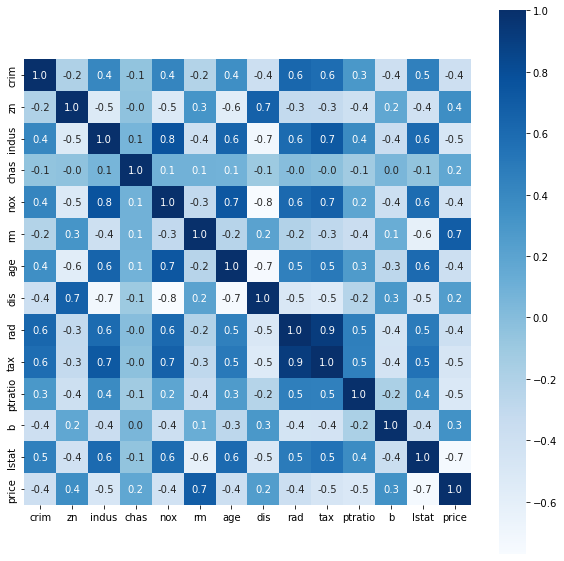

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

In [21]:
X_train = data.drop(['price'], axis=1)
y_train = data['price']

In [22]:
print(X_train)
print(y_train)

        crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2)

In [24]:
print(X_train.shape, Xtrain.shape, Xtest.shape)

(506, 13) (404, 13) (102, 13)


In [25]:
xgbmodel = XGBRegressor()

In [26]:
xgbmodel.fit(Xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [28]:
data_pred = xgbmodel.predict(Xtrain)
print(data_pred)

[23.147501  20.99463   20.090284  34.69053   13.903663  13.510157
 21.998634  15.1940975 10.899711  22.709627  13.832816   5.592794
 29.810236  49.99096   34.89215   20.607384  23.351097  19.23555
 32.695698  19.641418  26.991022   8.401829  46.00729   21.708961
 27.062933  19.321356  19.288303  24.809872  22.61626   31.70493
 18.542515   8.697379  17.395294  23.700663  13.304856  10.492197
 12.688369  25.016556  19.67495   14.902088  24.193798  25.007143
 14.900281  16.995798  15.6009035 12.699232  24.51537   14.999952
 50.00104   17.525454  21.184624  31.998049  15.613355  22.89754
 19.325378  18.717896  23.301125  37.222923  30.09486   33.102703
 21.00072   49.999332  13.405827   5.0280113 16.492886   8.405072
 28.64328   19.499939  20.586452  45.402164  39.79833   33.407326
 19.83506   33.406372  25.271482  50.001534  12.521657  17.457413
 18.61758   22.602625  50.002117  23.801117  23.317268  23.087355
 41.700035  16.119293  31.620516  36.069206   7.0022025 20.3827
 19.996452  11.

In [30]:

score_1 = metrics.r2_score(ytrain, data_pred)
score_2 = metrics.mean_absolute_error(ytrain, data_pred)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999948236320982
Mean Absolute Error :  0.0145848437110976


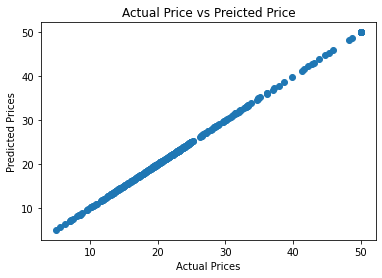

In [31]:
plt.scatter(ytrain, data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [32]:
test_data_prediction = xgbmodel.predict(Xtest)

In [34]:
score_1 = metrics.r2_score(ytest, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(ytest, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8711660369151691
Mean Absolute Error :  2.2834744154238233


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [38]:
lin_model = LinearRegression()
rigde_model = Ridge()
lasso_model = Lasso()
rf_model = RandomForestRegressor()

In [39]:
lin_model.fit(Xtrain, ytrain)

LinearRegression()

In [41]:
lin_data_pred = lin_model.predict(Xtrain)
print(lin_data_pred)

[25.01156658 23.20086342 19.63206629 30.79723661 13.29598163 12.35655178
 21.17619058 11.52105413 13.48284934 23.29619143 16.67181245 11.9640623
 32.53526883 25.38737924 29.80188665 19.51269487 24.14966495 24.10079632
 30.6933436  19.14366521 33.53309203  3.93459665 41.11203484 24.48533152
 20.09948308 23.54618062 21.50057915 25.02443747 22.39275602 33.67942244
 25.49286716  8.07877994 17.45164918 10.02711469 20.30483806 12.97802751
 18.36662544 25.4320083  14.00655745 17.89557148 24.77620977 28.90131112
 17.27439484 23.1865498  12.62489379 11.32274928 27.4978866  19.49269776
 44.80229099 16.9529603  22.44602306 33.66680303 20.2706101  20.70205114
 20.98558754 21.63228494 27.05322369 33.11940621 25.61757987 32.73314444
 20.91920151 41.11899411 15.32086807  8.42394611 22.84480968 13.72210624
 28.60744627 17.09291577 26.76454185 39.14699941 34.90240572 35.55989745
 21.98217997 28.96612576 25.11129326 42.52704888 19.53053513 22.63970213
 17.14416523 27.37214688 33.68385271 25.77228001 26.

In [42]:
score_1 = metrics.r2_score(ytrain, lin_data_pred)
score_2 = metrics.mean_absolute_error(ytrain, lin_data_pred)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.7285831776605591
Mean Absolute Error :  3.384457539916797


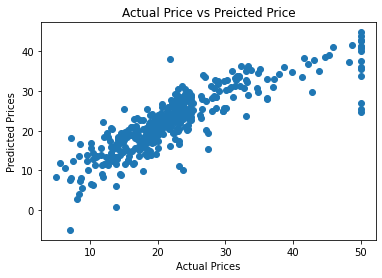

In [43]:
plt.scatter(ytrain, lin_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [73]:
lin_test_data_prediction = lin_model.predict(Xtest)

In [46]:
score_1 = metrics.r2_score(ytest, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(ytest, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.7789207451814422
Mean Absolute Error :  3.1130437468934176


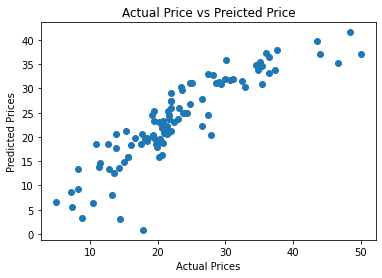

In [74]:
plt.scatter(ytest, lin_test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [52]:
rf_model.fit(Xtrain, ytrain)

RandomForestRegressor()

In [53]:
rf_data_pred = rf_model.predict(Xtrain)
print(rf_data_pred)

[23.618 21.011 21.459 34.955 14.697 14.533 21.849 15.401 13.131 22.175
 14.256  6.737 29.168 47.123 34.279 20.787 22.301 19.68  33.    19.808
 26.34   8.68  44.228 21.494 23.061 19.615 19.652 25.666 22.511 31.733
 19.467  9.124 18.435 20.99  13.463 10.22  12.284 24.206 19.483 15.096
 23.995 27.486 15.637 17.071 15.619 13.723 25.611 16.34  48.428 17.816
 21.48  32.791 16.777 23.118 19.863 19.235 22.825 35.674 30.026 32.718
 21.508 47.379 13.646  6.543 19.141 10.051 26.884 19.072 21.028 46.131
 39.854 34.118 20.629 34.326 24.994 49.382 13.272 18.637 19.758 22.302
 48.016 23.841 24.798 21.667 43.964 18.318 31.211 34.995  7.857 20.123
 18.944 12.44  24.578 48.017 36.068 21.796 38.093 17.951 15.146 28.174
 21.922 19.738 17.876 19.305 19.988 22.011 20.171 33.109 21.125 12.967
 19.082 20.906 17.714 19.931 48.392 15.887 15.94  18.561 14.317 32.856
 15.094 44.321 34.33  19.855 14.576  9.337 11.177 12.754 19.043  8.644
 23.01  12.112 20.146 46.483 22.242 19.616 31.664 21.021 32.363 32.098
 14.61

In [54]:
score_1 = metrics.r2_score(ytrain, rf_data_pred)
score_2 = metrics.mean_absolute_error(ytrain, rf_data_pred)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9816087110575238
Mean Absolute Error :  0.849945544554455


In [77]:
rf_test_data_prediction = rf_model.predict(Xtest)
score_1 = metrics.r2_score(ytest, rf_test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(ytest, rf_test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8880392106193861
Mean Absolute Error :  2.154039215686274


In [58]:
rigde_model.fit(Xtrain, ytrain)
ridge_data_pred = rigde_model.predict(Xtrain)
print(ridge_data_pred)

[25.17295307 23.3870198  19.74397975 30.78152279 13.50255552 12.67565354
 21.08111355 11.04324891 13.56310834 24.10569534 16.03886373 11.98778317
 32.18140948 25.0842246  29.93324643 19.40758762 24.20180931 23.90278185
 30.75067776 19.34280171 32.97503601  4.13173161 40.70212869 23.8698408
 19.84242603 23.44193806 21.40896543 25.30760238 22.42944857 33.524385
 25.23534701  8.29056417 17.17154084  9.82477598 20.2156485  13.47133637
 18.54835041 24.98831007 14.15267303 18.39409012 24.57861012 28.31230052
 17.72448926 24.44702026 12.67907716 11.41018765 27.85310468 19.278362
 44.42887775 17.2392329  22.37147757 33.53294025 21.50433936 21.18966466
 20.8398149  22.07161553 26.74936498 33.15873236 26.23428388 32.53311168
 21.22498557 41.21267729 16.37841024  8.54389973 23.14731868 13.98081979
 28.4055177  16.82209394 26.1409507  38.76188661 34.77806191 35.43962814
 21.93788047 29.30128073 25.28827914 42.12715494 19.65869304 22.15771207
 17.60856912 27.27083938 33.33913734 25.81989197 27.7823

In [59]:
score_1 = metrics.r2_score(ytrain, ridge_data_pred)
score_2 = metrics.mean_absolute_error(ytrain, ridge_data_pred)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.7265745724418409
Mean Absolute Error :  3.3662999390828703


In [78]:
rigde_test_data_prediction = rigde_model.predict(Xtest)
score_1 = metrics.r2_score(ytest, rigde_test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(ytest, rigde_test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.773410232276074
Mean Absolute Error :  3.164121497971413


In [61]:
lasso_model.fit(Xtrain, ytrain)
lasso_data_pred = lasso_model.predict(Xtrain)
print(lasso_data_pred)

[26.20907913 24.6303664  21.15071198 30.38927193 16.04253709 14.2722433
 22.5059338  12.2926882  15.31179378 23.22325057 17.14471178 10.86816112
 31.0155499  25.72855131 29.28455781 19.60862685 25.70737729 24.60285862
 30.04472508 20.70210227 31.44993079  1.81495016 35.3165761  24.65507384
 20.20894316 24.49155195 21.64503483 26.84731176 22.65763665 31.71971758
 24.99116098  7.62698443 18.74762878  6.66282853 17.09065957 14.15861504
 19.52323532 26.45294242 14.56144683 18.29228169 24.18324768 27.04306349
 18.12863901 23.60151636 14.71488912 12.25384855 29.20357541 19.02631671
 37.54201128 18.76497695 22.46280178 33.00853616 20.74599151 23.88923102
 21.14915641 24.29828797 24.02131616 31.64520979 30.3376011  30.78491614
 21.65432743 35.45281375 14.63829632 10.92901406 23.82544349 11.24138993
 28.43469955 16.34303957 26.5649879  35.73590487 31.14531356 32.70906509
 22.24995974 29.85169702 26.19705126 35.54415025 18.17658905 23.16766091
 21.55254512 26.7122225  30.90632495 26.38757221 30.

In [62]:
score_1 = metrics.r2_score(ytrain, lasso_data_pred)
score_2 = metrics.mean_absolute_error(ytrain, lasso_data_pred)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.6711914173003578
Mean Absolute Error :  3.695358402053464


In [79]:
lasso_test_data_prediction = lasso_model.predict(Xtest)
score_1 = metrics.r2_score(ytest, lasso_test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(ytest, lasso_test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.7278708111412346
Mean Absolute Error :  3.479992839660714


In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [65]:
def metrics_print(y_test, pred):  
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print('MAE:', mae)
    print('MSE:', mse)
    print('R2:', r2)
    print('')

In [66]:
def save_metrics(y_test,pred):
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    return mae, mse, r2

In [80]:
print('Metrics for Lin train:\n')
metrics_print(ytrain, lin_data_pred)
print('Metrics for Lin test:\n')
metrics_print(ytest, lin_test_data_prediction)

Metrics for Lin train:

MAE: 3.384457539916797
MSE: 22.95369357611288
R2: 0.7285831776605591

Metrics for Lin test:

MAE: 3.1130437468934176
MSE: 18.49542012244836
R2: 0.7789207451814422



In [82]:
print('Metrics for rf train:\n')
metrics_print(ytrain, rf_data_pred)
print('Metrics for rf test:\n')
metrics_print(ytest, rf_test_data_prediction)

Metrics for rf train:

MAE: 0.849945544554455
MSE: 1.5553494702970299
R2: 0.9816087110575238

Metrics for rf test:

MAE: 2.154039215686274
MSE: 9.366604019607838
R2: 0.8880392106193861



In [83]:
print('Metrics for rigde train:\n')
metrics_print(ytrain, ridge_data_pred)
print('Metrics for rigde test:\n')
metrics_print(ytest, rigde_test_data_prediction)

Metrics for rigde train:

MAE: 3.3662999390828703
MSE: 23.123561118988242
R2: 0.7265745724418409

Metrics for rigde test:

MAE: 3.164121497971413
MSE: 18.95642787895905
R2: 0.773410232276074



In [84]:
print('Metrics for lasso train:\n')
metrics_print(ytrain, lasso_data_pred)
print('Metrics for lasso test:\n')
metrics_print(ytest, lasso_test_data_prediction)

Metrics for lasso train:

MAE: 3.695358402053464
MSE: 27.8073090217106
R2: 0.6711914173003578

Metrics for lasso test:

MAE: 3.479992839660714
MSE: 22.766241362875565
R2: 0.7278708111412346



In [105]:
lin_mae,lin_mse,lin_r2 = save_metrics(ytest, lin_test_data_prediction)
rf_mae, rf_mse,rf_r2 = save_metrics(ytest, rf_test_data_prediction)
rigde_mae, rigde_mse, rigde_r2 = save_metrics(ytest, rigde_test_data_prediction)
lasso_mae, lasso_mse, lasso_r2 = save_metrics(ytest, lasso_test_data_prediction)

In [100]:
lasso_model.coef_

array([-0.06160345,  0.04051973, -0.        ,  0.        , -0.        ,
        0.95854325,  0.0287643 , -0.60788027,  0.27947241, -0.01458622,
       -0.78959877,  0.01048665, -0.79663783])

In [95]:
lin_feat = pd.DataFrame(lin_model.coef_, index=X_train.columns, columns=['coef']).sort_values(['coef'], ascending=False)

In [96]:
lin_feat

,coef
rm,3.632885
chas,3.158979
rad,0.324066
zn,0.038904
b,0.011613
age,0.009351
tax,-0.011625
indus,-0.015152
crim,-0.108224
lstat,-0.558409


In [104]:
laso_feat=pd.DataFrame(lasso_model.coef_, index=X_train.columns, columns=['coef']).sort_values(['coef'], ascending=False)
laso_feat

,coef
rm,0.958543
rad,0.279472
zn,0.040520
age,0.028764
b,0.010487
indus,-0.000000
chas,0.000000
nox,-0.000000
tax,-0.014586
crim,-0.061603


In [107]:
algoritm = ['Linear Regression','Random Forest Regressor','Ridge Regression','Lasso Regression']
result = {'MAE':[lin_mae, rf_mae,  rigde_mae, lasso_mae],
         'MSE':[lin_mse, rf_mse, rigde_mse, lasso_mse],
         'R2':[lin_r2, rf_r2, rigde_r2, lasso_r2]
         }

In [108]:
Result = pd.DataFrame(result, index=algoritm)
Result

,MAE,MSE,R2
Linear Regression,3.113044,18.495420,0.778921
Random Forest Regressor,2.154039,9.366604,0.888039
Ridge Regression,3.164121,18.956428,0.773410
Lasso Regression,3.479993,22.766241,0.727871
